In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from mosaicml import *
from mosaicml.constants import MLModelFlavours

In [81]:
dataset = pd.read_csv('/data/Salary_Data_2.csv')
X_sch = dataset.drop(["salary"],axis =1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X_sch)
print (X)
print(y)

    yearsexperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

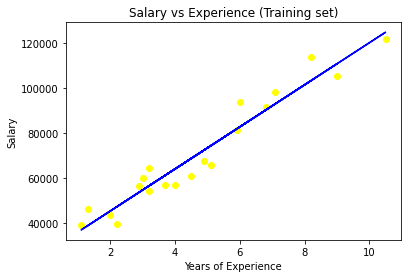

In [51]:
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

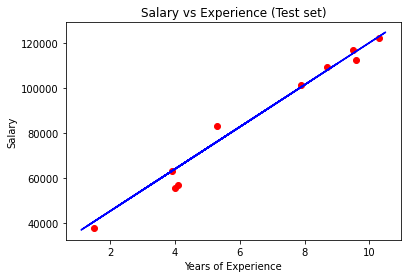

In [52]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [82]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data = pd.DataFrame(eval(payload))
    prediction = pd.Series(model.predict(data))
    return prediction.tolist()
X_sch

,yearsexperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [91]:
req = requests.Request()
req.json = {"payload":X_sch.to_json()}

sch = generate_schema(score,(model, req), X_sch)
print(sch)

{'input': {'type': 'pd.core.frame.DataFrame', 'items': {'type': 'object', 'properties': {'yearsexperience': {'type': 'number', 'format': 'double'}}}, 'example': [{'yearsexperience': 1.1}, {'yearsexperience': 1.3}]}, 'output': {'type': 'array', 'items': {'type': 'object'}, 'example': [37096.7289314658, 38965.91742009026]}}


In [86]:
register_model(model, score, name="SalarySimpleLinearRegression", 
                description="Predict Salary",
                flavour=MLModelFlavours.sklearn, schema=sch,
                y_true=y_test, y_pred=pd.Series(y_pred), 
                prob=y_pred, features=X_sch.columns, labels=["salary"], init_script="" ,
                model_type="regression", 
                input_type="json", explain_ai=True, x_train=X_train, x_test=X_test, 
                y_train=y_train, y_test=y_test,
                feature_names=list(X_sch.columns),feature_ids=list(X_sch.columns),
                target_names=["price"], 
                kyd=False, kyd_score =False
              )
print("Registering model")